# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc_amount = 1.2
my_eth_amount = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
import json
btc_url = btc_url + "?format=json"
response_request = requests.get(btc_url)
data = response_request.json()
btc_current_price = data["data"]["1"]["quotes"]["USD"]["price"]


# Fetch current ETH price
eth_url = eth_url + "?format=json"
response_request = requests.get(eth_url)
data = response_request.json()
eth_current_price = data["data"]["1027"]["quotes"]["USD"]["price"]


# Compute current value of my crpto
my_btc = (btc_current_price*my_btc_amount)
my_eth = (eth_current_price*my_eth_amount)


# Print current crypto wallet balance
print(f"The current value of your BTC is ${my_btc:0.2f}")
print(f"The current value of your ETH is ${my_eth:0.2f}")


The current value of your BTC is $27384.00
The current value of your ETH is $9665.50


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
shares_data = {
    "shares": [200, 50]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
AGG,200
SPY,50


In [8]:
# Set Alpaca API key and secret
alpaca_key = os.getenv('alpaca_api_key')
alpaca_secret_key = os.getenv('alpaca_secret_key')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2022-08-15", tz="America/New_York").isoformat()

# Set the tickers

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

#df_portfolio.index = df_portfolio.index.date


# Preview DataFrame
df_portfolio

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-08-15 04:00:00+00:00  103.35  103.45  103.24  103.25  3782889   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-08-15 04:00:00+00:00       13203  103.311601  424.71  429.41  424.71   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-08-15 04:00:00+00:00  428.86  53978293      374486  427.636415

In [10]:
# Pick AGG and SPY close prices

agg_price = float(df_portfolio["AGG"]["close"])
spy_price = float(df_portfolio["SPY"]["close"])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_price}")
print(f"Current SPY closing price: ${spy_price}")

Current AGG closing price: $103.25
Current SPY closing price: $428.86


In [11]:
# Compute the current value of shares
agg_value = agg_price * df_shares.loc["AGG"]["shares"]
spy_value = spy_price * df_shares.loc["SPY"]["shares"]

# Print current value of shares

print(f"The current value of your SPY shares is ${agg_value:0.2f}")
print(f"The current value of your AGG shares is ${spy_value:0.2f}")

The current value of your SPY shares is $20650.00
The current value of your AGG shares is $21443.00


### Savings Health Analysis

In [49]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data

value_data = {
    "Assets": [agg_value, spy_value, my_btc, my_eth]
}

tickers = ["AGG", "SPY", "BTC", "ETH"]

# Create savings DataFrame
df_savings = pd.DataFrame(value_data, index=tickers)

# Display savings DataFrame
df_savings

,Assets
AGG,20650.000
SPY,21443.000
BTC,27384.000
ETH,9665.504


<AxesSubplot:title={'center':'Savings Pie Chart'}, ylabel='Assets'>

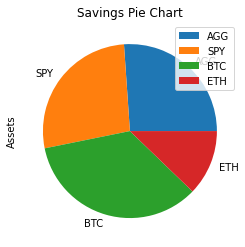

In [50]:
# Plot savings pie chart
df_savings.plot.pie(y="Assets", title="Savings Pie Chart")


In [52]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum()
total_savings = (int(total_savings))
# Validate saving health
if total_savings >= emergency_fund:
    print("You have enough savings.")
elif total_savings < emergency_fund:
    amount_needed = emergency_fund - total_savings
    print("You don't have enough savings. Save $",amount_needed, "more.")

You have enough savings.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [53]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [56]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
timeframe="1Day"

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [57]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [58]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [65]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_fiveyear.calc_cumulative_return()

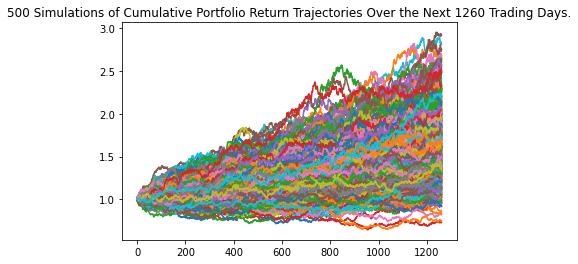

In [66]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

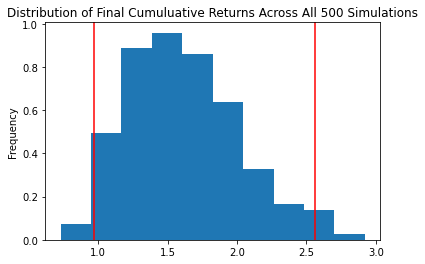

In [67]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

### Retirement Analysis

In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.619474
std               0.400611
min               0.729181
25%               1.330001
50%               1.581454
75%               1.870864
max               2.920647
95% CI Lower      0.966956
95% CI Upper      2.562285
Name: 1260, dtype: float64


/Users/andremontgomery/Desktop/ASU-Copy/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [69]:
# Set initial investment
initial_investment = 20000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19339.12 and $51245.71


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [70]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $19339.12 and $51245.71


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")